# Solver Performance Comparisons

This notebook demonstrates our testing and comparing the performance of different general purpose solvers.

### Imports and Setup

In [1]:
# Standard library
import os

# Third party
import matplotlib.pyplot as plt
import matplotlib_inline

import pandas as pd
import seaborn as sns 

# Local
import flexibleSubsetSelection as fss

# Initialize notebook settings
sns.set_theme() # set seaborn theme
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # vector plots
%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [2]:
directory = "../data/Fig4-performance" # data directory for this notebook
file = "performanceData.csv"           # performance data file name
subsetSize = 10                        # size of subset selected
verbose = False                        # verbosity of solvers
seeds = [123, 231, 321, 132, 213]      # random generation seeds
numTrials = 5                          # number of trials per condition

In [3]:
for datasetLength in range(100, 1100, 100):
    dataset = fss.Dataset(randTypes = "uniform", 
                          size = (datasetLength, 10), 
                          seed = seeds[0])
    
    dataset.preprocess(mean=fss.metric.mean)
    meanLoss = fss.UniCriterion(objective = fss.objective.preserveMetric, 
                            metric = fss.metric.mean,
                            datasetMetric = dataset.mean)
    
    dataset.preprocess(range=fss.metric.range)
    rangeLoss = fss.UniCriterion(objective = fss.objective.preserveMetric, 
                                 metric = fss.metric.range,
                                 datasetMetric = dataset.range)
    lossFunctions = [meanLoss, rangeLoss]

    solver = fss.Solver(algorithm = fss.algorithm.greedySwap, 
                    lossFunction = meanLoss, 
                    logPath = os.path.join(directory, file))

    for i in range(numTrials):
        for j, lossFunction in enumerate(lossFunctions):
            # print(f"{i/numTrials:.2%}")
            solver.lossFunction = lossFunction

            solver.algorithm = fss.algorithm.greedySwap
            subset = solver.solve(dataset, subsetSize=subsetSize)

            # solver.algorithm = fss.algorithm.optimization
            # subset = solver.solve(dataset, subsetSize=subsetSize)

            solver.algorithm = fss.algorithm.bestOfRandom
            subset = solver.solve(dataset, subsetSize=subsetSize)

            solver.algorithm = fss.algorithm.worstOfRandom
            subset = solver.solve(dataset, subsetSize=subsetSize)


Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.01s, loss=0.48).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.0s, loss=1.34).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.0s, loss=4.84).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.08s, loss=1.34).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.0s, loss=3.92).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.0s, loss=9.87).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.02s, loss=0.69).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.0s, loss=1.6).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.0s, loss=4.45).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.01s, loss=0.93).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.0s, loss=4.0).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0.0s, loss=11.24).
Solved for Subset(size: (np.float64(10.0), 10), solve time: 0

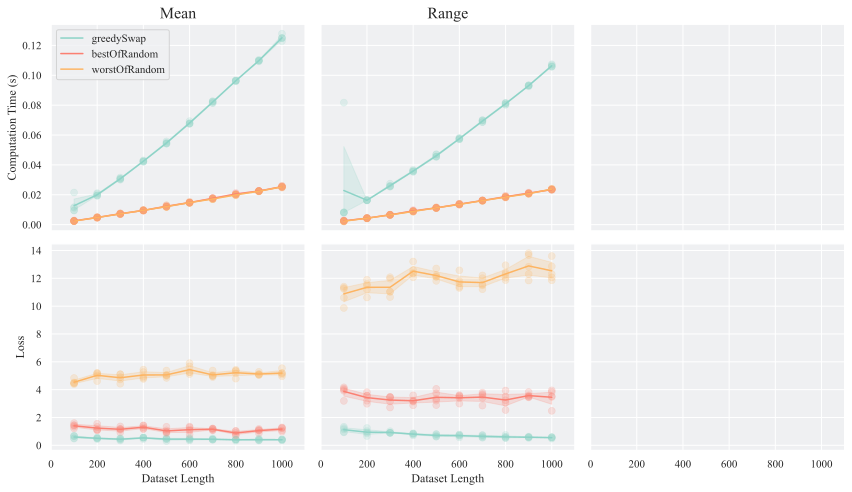

In [14]:
# Initialize color and plot settings
color = fss.plot.Color()
fss.plot.initialize(color)

# Create figure
fig, axs = plt.subplots(nrows = 2,
                        ncols = 3, 
                        figsize = (12, 7), 
                        sharex = True, 
                        sharey = "row")

algorithms = ["greedySwap", "bestOfRandom", "worstOfRandom"]
objectives = ["mean", "range"]
palette = color.getPalette(algorithms, ["green", "orange", "yellow"])
df = pd.read_csv(os.path.join(directory, file))

for i, objective in enumerate(objectives):
    data = df[df["Loss Function"].str.contains(objective, case=False)]
    for j, metric in enumerate(["Computation Time", "Loss"]):
        sns.scatterplot(x = "Dataset Length",
                        y = metric,
                        alpha = 0.2,
                        hue = "Algorithm",
                        palette = palette,
                        data = data,
                        ax = axs[j, i],
                        s = 50,
                        edgecolor = None)
        
        sns.lineplot(x = "Dataset Length",
                    y = metric,
                    hue = "Algorithm",
                    palette = palette,
                    data = data,
                    ax = axs[j, i])

        axs[j, i].set_xlim([0, 1100])
        axs[j, i].legend().set_visible(False)
    axs[0, i].set_title(objective.title(), fontsize=16)

handles, labels = axs[0, 0].get_legend_handles_labels()
axs[0, 0].legend(handles[len(algorithms):], labels[len(algorithms):])

axs[1, 0].set_ylabel("Loss")
axs[0, 0].set_ylabel("Computation Time (s)");